In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## PageRank Algorithm

In [468]:
def pagerank(G, teleportation_probability, max_iter=100, tol=1.0e-6, distribution_vector=None):
    """
    Calculate PageRank scores using the Google PageRank algorithm.

    Parameters:
        G (numpy.ndarray): The web graph matrix.
        alpha (float): Damping factor (teleportation probability).
        max_iter (int): Maximum number of iterations.
        tol (float): Convergence threshold.
        distribution_vector (numpy.ndarray): Distribution vector for teleportation

    Returns:
        numpy.ndarray: PageRank scores, iteration_no
    """
 
    web_graph_matrix = nx.to_numpy_array(G)
   # print(web_graph_matrix)
    n = len(web_graph_matrix)
    M = web_graph_matrix / np.sum(web_graph_matrix, axis=0, keepdims=True)  # Normalized adjacency matrix
   # print("print:",M)

    iteration_no = 0
    v = np.ones(n) / n  # Initial PageRank scores

    # Check if distribution vector is provided
    if distribution_vector is None:
        distribution_vector = np.ones(n) / n  # If not provided, initialize with equal probabilities

    # #account for dangling nodes
    # dead_nodes = np.where(np.sum(M, axis=1) == 0)[0]
    # for i in dead_nodes:
    #     M[:, i] = distribution_vector

    for i in range(max_iter):
        v_next = ((1 - teleportation_probability) * np.dot(M, v)) + (teleportation_probability)*distribution_vector  # PageRank update rule


        # Check for convergence
        if np.linalg.norm(v_next - v, ord=1) < tol:
            iteration_no = i
            break

        v = v_next

    return v, iteration_no


In [469]:
def simplified_pagerank(G, max_iter=100, tol=1.0e-6):

    web_graph_matrix = nx.to_numpy_array(G)
    n = len(web_graph_matrix)
    M = web_graph_matrix / np.sum(web_graph_matrix, axis=0, keepdims=True)  # Normalized adjacency matrix

    v = np.ones(n) / n  # Initial PageRank scores
    iteration_no = 0

    for i in range(max_iter):
        v_next =  np.dot(M, v) # PageRank update rule

        # Check for convergence
        if np.linalg.norm(v_next - v, ord=1) < tol:
            iteration_no = i
            break

        v = v_next

    return v, iteration_no


In [470]:
# R = (I - c1*M)^-1*((1-c1)*E)
def second_closed_form(G, teleportation_probability, distribution_vector=None):
    M = nx.to_numpy_array(G)
    n = len(M)
    M = M / np.sum(M, axis=0, keepdims=True)  # Normalized adjacency matrix
    #print("print:",M)
    I = np.eye(len(M))
    c1 = 1 - teleportation_probability
    if distribution_vector is None:
        E = np.ones(n) / n
    else:
        E = distribution_vector
    inverted_matrix = np.linalg.inv(I - c1 * M)
    b = (1-c1)*E
    R = np.matmul(inverted_matrix, b)
    return R




In [471]:
def sanity_check(iteration, closed_form):
    if np.allclose(iteration, closed_form,rtol=1e-05,atol=1e-05):
        #print("Power iteration and closed form yielded the same page rank")
        return "Correct"
    else:
        #print("Power iteration and closed form are incorrect")
        return "Incorrect"

In [472]:
def plot_graph(G, title):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G.reverse(),pos,connectionstyle=f"arc3, rad = {0.08}",node_color='red')
    plt.title(title)

In [473]:
def generate_illustrative_example_graph():
    # Define the adjacency matrix
    adjacency_matrix = np.array([
        [0, 0.5, 0, 0],
        [1/3, 0, 0, 0.5],
        [1/3, 0, 1, 0.5],
        [1/3, 1/2, 0, 0]
    ])
    
    # Create an empty directed graph
    G = nx.DiGraph()

    # Add nodes to the graph
    G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)

    return G


In [474]:
def generate_dense_graph(n):

    # Probability of edge creation for sparse graph
    p_dense = 0.5

    # Generate sparse directed graph
    dense_graph = nx.erdos_renyi_graph(n, p_dense, directed=True)

    return dense_graph

In [488]:
def generate_sparse_graph(n):

    # Probability of edge creation for sparse graph
    p_sparse = 0.1

    # Generate sparse directed graph
    sparse_graph = nx.erdos_renyi_graph(n, p_sparse, directed=True)

    return sparse_graph

In [475]:
def remove_dangling_nodes(G):
    # Identify dangling nodes (nodes with no outgoing edges)
    dangling_nodes = [node for node, out_degree in G.out_degree() if out_degree == 0]

    # Remove dangling nodes from the graph
    G.remove_nodes_from(dangling_nodes)
    print(nx.to_numpy_array(G))
    return G

In [476]:
def normalize_columns(G):
    """
    Normalize the columns of a matrix.
    
    Parameters:
        matrix (numpy.ndarray): Input matrix.
        
    Returns:
        numpy.ndarray: Matrix with normalized columns.
    """
    matrix = nx.to_numpy_array(G)
    col_sums = np.sum(matrix, axis=0)
    normalized_matrix = matrix / col_sums[np.newaxis, :]
    return normalized_matrix


## Proving the lecture example

### power iterative

+---------------+-----------------------------------------------+-----------------------------------------------+--------------+-----------+
| PageRank Algo |                  Iteration PR                 |                 Closed Form PR                | Sanity Check | Iteration |
+---------------+-----------------------------------------------+-----------------------------------------------+--------------+-----------+
|   Simplified  |                  [0, 0, 1, 0]                 |                     Error                     |     NIL      |     41    |
|    Modified   | [0.10135159 0.12837872 0.64189097 0.12837872] | [0.10135135 0.12837838 0.64189189 0.12837838] |   Correct    |     24    |
+---------------+-----------------------------------------------+-----------------------------------------------+--------------+-----------+


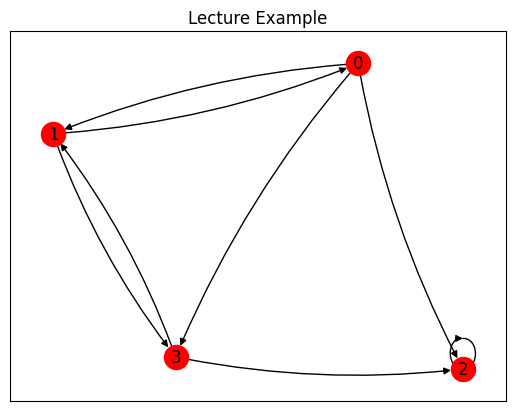

In [479]:
G = generate_illustrative_example_graph()
plot_graph(G, "Lecture Example")
teleportation = 0.2
max_iter = 100
tol = 1.0e-6

t = PrettyTable(['PageRank Algo', 'Iteration PR', 'Closed Form PR', 'Sanity Check', 'Iteration'])

#SIMPLIFIED
pagerank_scores_simplified, iteration_no = simplified_pagerank(G)
#closed_form = second_closed_form(G,1)
#check = sanity_check(pagerank_scores_simplified, closed_form)
pagerank_scores_simplified = [round(x) for x in pagerank_scores_simplified]
t.add_row(["Simplified", pagerank_scores_simplified, "Error", "NIL", iteration_no])

#MODIFIED
pagerank_scores_modified, iteration_no = pagerank(G, teleportation)
closed_form = second_closed_form(G,teleportation)
check = sanity_check(pagerank_scores_modified, closed_form)
t.add_row(["Modified", pagerank_scores_modified, closed_form, check, iteration_no])
print(t)


## Experiment 1: Lecture Graph 


### 1.1 Different teleportation probability 

In [482]:
G = generate_illustrative_example_graph()
teleportation = np.arange(0.1, 0.41, 0.01)
teleportation = [round(x,2) for x in teleportation]
max_iter = 100
tol = 1.0e-6
iteration_list = []

t = PrettyTable(['Teleportation Probability', 'Iteration PR', 'Closed Form PR', 'Sanity Check', 'Iteration'])

for teleportation_probability in teleportation:
    pagerank_scores, iteration_no = pagerank(G, teleportation_probability, max_iter, tol)
    iteration_list.append(iteration_no)
    closed_form = second_closed_form(G,teleportation_probability)
    check = sanity_check(pagerank_scores, closed_form)
    t.add_row([teleportation_probability, pagerank_scores, closed_form, check, iteration_no])
print(t)

+---------------------------+-----------------------------------------------+-----------------------------------------------+--------------+-----------+
| Teleportation Probability |                  Iteration PR                 |                 Closed Form PR                | Sanity Check | Iteration |
+---------------------------+-----------------------------------------------+-----------------------------------------------+--------------+-----------+
|            0.1            | [0.06024125 0.07831366 0.78313142 0.07831366] | [0.06024096 0.07831325 0.78313253 0.07831325] |   Correct    |     31    |
|            0.11           | [0.06501468 0.08430242 0.76638049 0.08430242] | [0.06501438 0.08430198 0.76638165 0.08430198] |   Correct    |     30    |
|            0.12           | [0.06961666 0.0900376  0.75030815 0.0900376 ] | [0.06961634 0.09003713 0.75030941 0.09003713] |   Correct    |     29    |
|            0.13           | [0.07405742 0.09553411 0.73487437 0.09553411] | [0.0

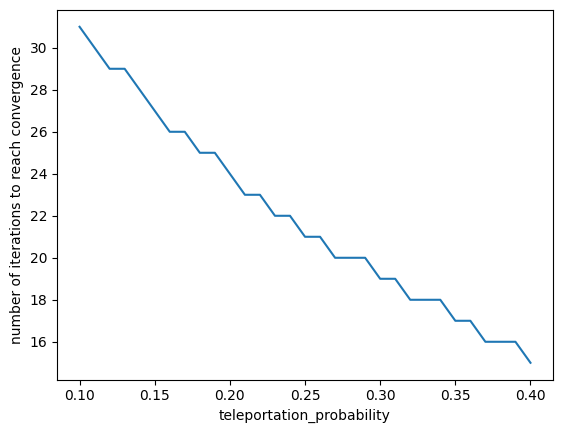

In [483]:
plt.plot(teleportation, iteration_list)
plt.xlabel('teleportation_probability')
plt.ylabel('number of iterations to reach convergence')
plt.show()
# Make sure to close the plt object once done
plt.close()

## Experiment 2: Dense Graph


### 2.1 Different teleportation probability 

In [485]:
G = generate_dense_graph(100)
teleportation = np.arange(0.1, 0.41, 0.01)
teleportation = [round(x,2) for x in teleportation]
max_iter = 100
tol = 1.0e-8
iteration_list = []
t = PrettyTable(['Teleportation Probability', 'Sanity Check', 'Iteration'])

for teleportation_probability in teleportation:
    pagerank_scores, iteration_no = pagerank(G, teleportation_probability, max_iter, tol)
    iteration_list.append(iteration_no)
    closed_form = second_closed_form(G,teleportation_probability)
    check = sanity_check(pagerank_scores, closed_form)
    t.add_row([teleportation_probability, check, iteration_no])
print(t)

+---------------------------+--------------+-----------+
| Teleportation Probability | Sanity Check | Iteration |
+---------------------------+--------------+-----------+
|            0.1            |   Correct    |     7     |
|            0.11           |   Correct    |     7     |
|            0.12           |   Correct    |     7     |
|            0.13           |   Correct    |     7     |
|            0.14           |   Correct    |     7     |
|            0.15           |   Correct    |     7     |
|            0.16           |   Correct    |     7     |
|            0.17           |   Correct    |     7     |
|            0.18           |   Correct    |     7     |
|            0.19           |   Correct    |     7     |
|            0.2            |   Correct    |     7     |
|            0.21           |   Correct    |     7     |
|            0.22           |   Correct    |     7     |
|            0.23           |   Correct    |     7     |
|            0.24           |  

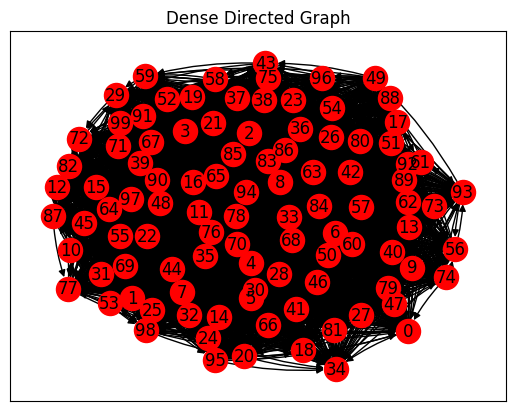

In [486]:
plot_graph(G, "Dense Directed Graph")

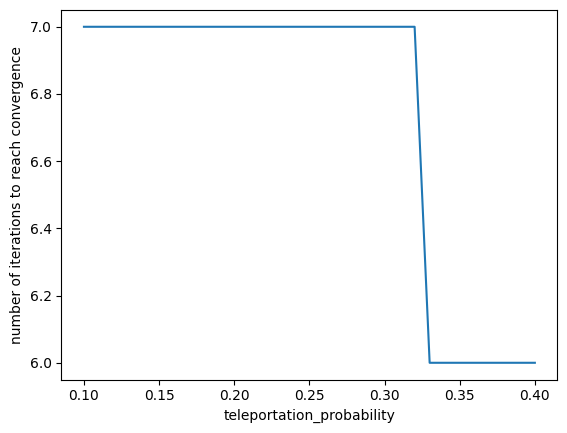

In [487]:
plt.plot(teleportation, iteration_list)
plt.xlabel('teleportation_probability')
plt.ylabel('number of iterations to reach convergence')
plt.show()
# Make sure to close the plt object once done
plt.close()

### Different graph size ie. no of nodes

In [510]:
import time
number_of_nodes = [x for x in range(100,2000,100)]
teleportation = 0.2
max_iter = 100
tol = 1.0e-10
iteration_list =[]
time_taken = []
t = PrettyTable(['Number of nodes', 'Sanity Check', 'Iteration', 'Time Taken'])
for n in number_of_nodes:
    start = time.time()
    G = generate_dense_graph(n)
    pagerank_scores, iteration_no = pagerank(G, teleportation, max_iter, tol)
    iteration_list.append(iteration_no)
    closed_form = second_closed_form(G,teleportation_probability)
    #print(f"pagerank:{pagerank_scores}, closed_form: {closed_form}")
    check = sanity_check(pagerank_scores, closed_form)
    time_ = time.time()-start
    t.add_row([n, check, iteration_no, time_])
    time_taken.append(time_)
print(t)

+-----------------+--------------+-----------+----------------------+
| Number of nodes | Sanity Check | Iteration |      Time Taken      |
+-----------------+--------------+-----------+----------------------+
|       100       |   Correct    |     9     | 0.06121563911437988  |
|       200       |   Correct    |     7     | 0.036005496978759766 |
|       300       |   Correct    |     7     | 0.08101797103881836  |
|       400       |   Correct    |     7     | 0.14603471755981445  |
|       500       |   Correct    |     6     | 0.22004961967468262  |
|       600       |   Correct    |     6     |  0.3250730037689209  |
|       700       |   Correct    |     6     | 0.45710301399230957  |
|       800       |   Correct    |     6     |  0.5761322975158691  |
|       900       |   Correct    |     6     |  0.729170560836792   |
|       1000      |   Correct    |     6     |  0.8951964378356934  |
|       1100      |   Correct    |     6     |  1.0642387866973877  |
|       1200      | 

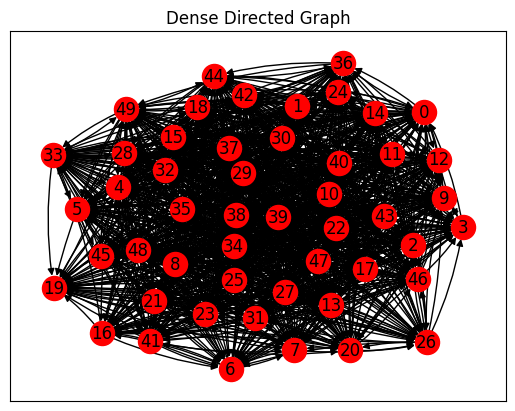

In [498]:
plot_graph(generate_dense_graph(50), "Dense Directed Graph")

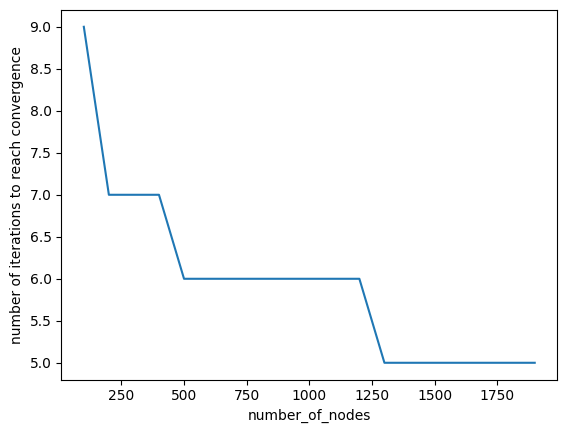

In [511]:
plt.plot(number_of_nodes, iteration_list)
plt.xlabel('number_of_nodes')
plt.ylabel('number of iterations to reach convergence')
plt.show()
# Make sure to close the plt object once done
plt.close()

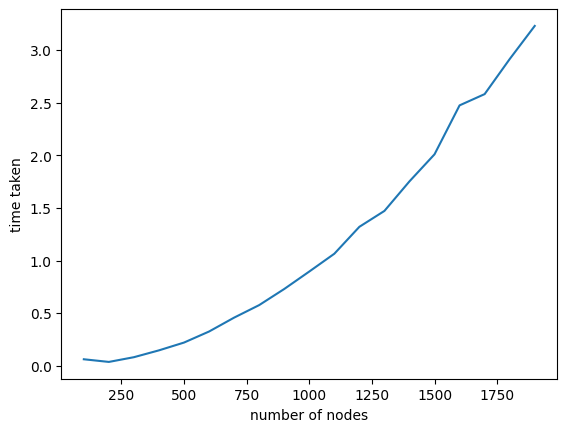

In [512]:
plt.plot(number_of_nodes, time_taken)
plt.xlabel('number of nodes')
plt.ylabel('time taken')
plt.show()
# Make sure to close the plt object once done
plt.close()

### Sparse graph

In [513]:
import time
number_of_nodes = [x for x in range(100,2000,100)]
teleportation = 0.2
max_iter = 100
tol = 1.0e-10
iteration_list =[]
time_taken = []
t = PrettyTable(['Number of nodes', 'Sanity Check', 'Iteration', 'Time Taken'])
for n in number_of_nodes:
    start = time.time()
    G = generate_sparse_graph(n)
    pagerank_scores, iteration_no = pagerank(G, teleportation, max_iter, tol)
    iteration_list.append(iteration_no)
    closed_form = second_closed_form(G,teleportation_probability)
    #print(f"pagerank:{pagerank_scores}, closed_form: {closed_form}")
    check = sanity_check(pagerank_scores, closed_form)
    time_ = time.time()-start
    t.add_row([n, check, iteration_no, time_])
    time_taken.append(time_)
print(t)

+-----------------+--------------+-----------+----------------------+
| Number of nodes | Sanity Check | Iteration |      Time Taken      |
+-----------------+--------------+-----------+----------------------+
|       100       |   Correct    |     16    | 0.14400410652160645  |
|       200       |   Correct    |     12    | 0.014002323150634766 |
|       300       |   Correct    |     11    |  0.0290071964263916  |
|       400       |   Correct    |     10    | 0.23005223274230957  |
|       500       |   Correct    |     10    | 0.07001614570617676  |
|       600       |   Correct    |     9     | 0.12102723121643066  |
|       700       |   Correct    |     9     | 0.16303753852844238  |
|       800       |   Correct    |     9     |  0.2030477523803711  |
|       900       |   Correct    |     9     |  0.2450575828552246  |
|       1000      |   Correct    |     8     | 0.29706811904907227  |
|       1100      |   Correct    |     8     |  0.3380706310272217  |
|       1200      | 

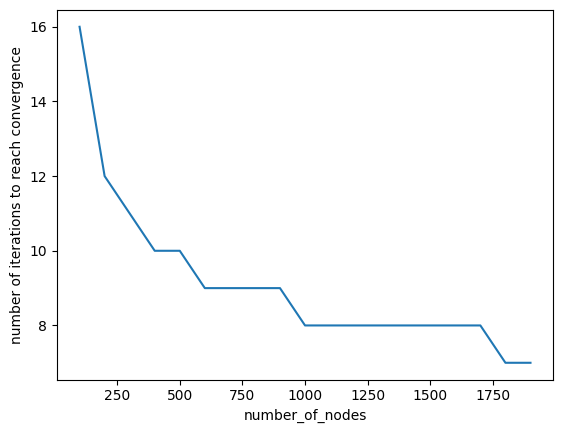

In [514]:
plt.plot(number_of_nodes, iteration_list)
plt.xlabel('number_of_nodes')
plt.ylabel('number of iterations to reach convergence')
plt.show()
# Make sure to close the plt object once done
plt.close()

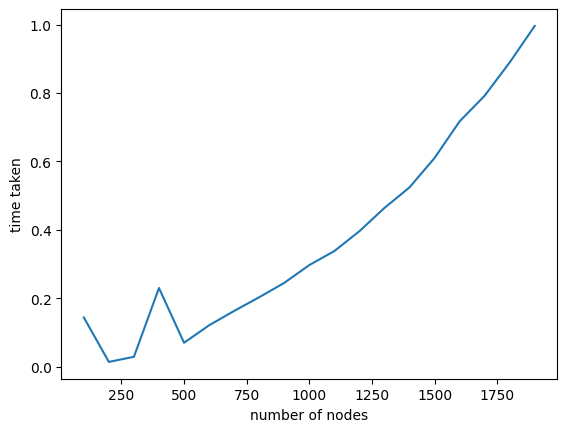

In [515]:
plt.plot(number_of_nodes, time_taken)
plt.xlabel('number of nodes')
plt.ylabel('time taken')
plt.show()
# Make sure to close the plt object once done
plt.close()

## Experiment 3: Very large graph

In [225]:
G = nx.read_edgelist('web-Google.txt', create_using = nx.DiGraph)
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 875713
Number of edges 5105039
Average degree 11.659160021605253


In [226]:
pagerank_scores, iteration_no = pagerank(G, teleportation_probability, max_iter, tol)
print(f"PageRank scores: {pagerank_scores} and it converges at iteration: {iteration_no}")

MemoryError: Unable to allocate 5.58 TiB for an array with shape (875713, 875713) and data type float64

### Experiment 4: Different distribution vector

In [444]:
def randomize_distribution_vector(num_nodes):
    """
    Generate a randomized distribution vector.

    Parameters:
        num_nodes (int): Number of nodes in the graph.

    Returns:
        numpy.ndarray: Randomized distribution vector.
    """
    # Generate random values
    random_vector = np.random.rand(num_nodes)
    # Normalize the vector
    normalized_vector = random_vector / np.sum(random_vector)
    return normalized_vector



In [447]:
n = 10 #number of nodes
distribution_vector = []
for i in range(n):
    distribution_vector.append(randomize_distribution_vector(n))
teleportation = 0.8
max_iter = 100
tol = 1.0e-6
iteration_list =[]
t = PrettyTable(['Distribution Vector', 'Sanity Check', 'Iteration'])
G = generate_dense_graph(n)
for vector in distribution_vector:
    pagerank_scores, iteration_no = pagerank(G, teleportation, max_iter, tol, distribution_vector=vector)
    iteration_list.append(iteration_no)
    closed_form = second_closed_form(G,teleportation_probability, distribution_vector=vector)
    #print(f"pagerank:{pagerank_scores}, closed_form: {closed_form}")
    check = sanity_check(pagerank_scores, closed_form)
    t.add_row([vector, check, iteration_no])
    print(sum(closed_form))
print(t)

1.0000000000000018
1.0000000000000016
1.0000000000000016
1.0000000000000016
1.0000000000000016
1.0000000000000013
1.0000000000000018
1.0000000000000013
1.0000000000000018
1.0000000000000016
+--------------------------------------------------------------------+--------------+-----------+
|                        Distribution Vector                         | Sanity Check | Iteration |
+--------------------------------------------------------------------+--------------+-----------+
| [0.01713829 0.05624961 0.14358557 0.14799177 0.00865597 0.03874657 |   Correct    |     13    |
|            0.17195557 0.18384356 0.09351719 0.13831591]            |              |           |
| [0.15731005 0.02753179 0.05010627 0.20503824 0.09587277 0.03711136 |   Correct    |     13    |
|            0.01621054 0.19389566 0.10304761 0.11387571]            |              |           |
| [0.1104326  0.03765219 0.17562758 0.00231416 0.12060631 0.07832691 |   Correct    |     14    |
|            0.22956244 0.